<a href="https://colab.research.google.com/github/psfleury/Data_Science_Projects/blob/main/Analisando_os_Dados_do_Airbnb_Barcelona.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 3.0**
*by [sigmoidal.ai](https://sigmoidal.ai)*

---

**Autor : Pedro de Souza Fleury**

# Análise dos Dados do Airbnb - *Barcelona*

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade de Barcelona, e ver quais insights podem ser extraídos a partir de dados brutos.**

## Obtenção dos Dados

Inicialmente, faz-se a importação das bibliotecas python que serão utilizadas ao longo da análise, ressaltando a importância do pandas para o manejo de *dataframes*.

In [46]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline 

In [47]:
# importar o arquivo listings.csv para um DataFrame
# df = pd.read_csv("http://data.insideairbnb.com/spain/catalonia/barcelona/2021-07-07/visualisations/listings.csv")
df = pd.read_csv("https://raw.githubusercontent.com/psfleury/Data_Science_Projects/master/listings.csv")

## Análise dos Dados


**Dicionário das variáveis**

* id - código id do imóvel listado para locação;
* name - descrição do que está sendo anunciado; 
* host_id - código id do locador do imóvel;
* host_name - nome do locador do imóvel; 
* neighbourhood_group - distritos da cidade. Para detalhes, ver: https://pt.wikipedia.org/wiki/Distritos_de_Barcelona;
* neighbourhood - nome do bairro;
* latitude - latitude do imóvel;
* longitude - longitude do imóvel
* room_type - tipo de acomodação oferecida;
* price - preço anunciado;
* minimun_nights - número mínimo de noites para a reserva;
* number_of_reviews - número de avaliações da acomodação;
* last_review - data da avaliação mais recente da acomodação;
* reviews_per_month - média de avaliações por mês
* calculated_host_listings_count - número de acomodações listadas do locador;
* availability_365 - disponibilidade em dias da acomodação a cada 365 dias

Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 10 primeiras entradas.

Um passo inicial é verificar se a coluna 'id' é de fato uma chave primária do dataset, o que foi confirmado ao se verificar que não há repetições. Tive essa dúvida por imaginar que o mesmo imóvel poderia estar listado mais de uma vez, para diferentes cômodos, o que não se verificou a partir desta coluna.

In [48]:
# mostrar as 10 primeiras entradas
df.head(10)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,18674,Huge flat for 8 people close to Sagrada Familia,71615,Mireia And Maria,Eixample,la Sagrada Família,41.40556,2.17262,Entire home/apt,169,1,21,2019-10-11,0.23,18,60
1,23197,Forum CCIB DeLuxe★Spacious &Elegant★Large Balcony,90417,Etain (Marnie),Sant Martí,el Besòs i el Maresme,41.41291,2.22063,Entire home/apt,240,3,52,2019-12-15,0.78,2,169
2,32711,Sagrada Familia area - Còrsega 1,135703,Nick,Gràcia,el Camp d'en Grassot i Gràcia Nova,41.40566,2.17015,Entire home/apt,144,2,63,2019-09-06,0.62,3,8
3,34241,Private Double room - Plaza Real,73163,Andres,Ciutat Vella,el Barri Gòtic,41.38062,2.17517,Private room,50,30,8,2012-12-30,0.06,2,35
4,34981,VIDRE HOME PLAZA REAL on LAS RAMBLAS,73163,Andres,Ciutat Vella,el Barri Gòtic,41.37978,2.17623,Entire home/apt,283,4,150,2020-03-11,1.54,2,148
5,35379,Double 04 CasanovaRooms Barcelona,152232,Pablo,Eixample,l'Antiga Esquerra de l'Eixample,41.39161,2.15075,Private room,23,2,352,2021-06-24,4.09,4,190
6,35388,Single 01 CasanovaRooms Barcelona,152232,Pablo,Eixample,l'Antiga Esquerra de l'Eixample,41.39082,2.15242,Private room,17,2,303,2019-10-01,3.51,4,191
7,35390,Single 02 CasanovaRooms Barcelona,152232,Pablo,Eixample,l'Antiga Esquerra de l'Eixample,41.39047,2.15263,Private room,17,2,307,2021-07-01,3.67,4,188
8,35392,Double 03 CasanovaRooms Barcelona,152232,Pablo,Eixample,l'Antiga Esquerra de l'Eixample,41.39013,2.15231,Private room,22,2,255,2020-03-14,3.39,4,188
9,36763,In front of the beach,158596,Ester,Ciutat Vella,la Barceloneta,41.38043,2.19094,Private room,36,2,76,2019-08-21,1.30,1,226


In [49]:
# verificação se os ids de imóvel para locação se repetem ou se são chave primária
df.id.value_counts().sum() == df.shape[0]

True

### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

Verifica-se que o *dataset* possui 17.079 registros (entradas), distribuídas em 16 atributos (variáveis). Deles, 10 são númericos (7 inteiros e 3 de ponto flutuante). Os demais são atributos textuais, considerados como 'object' pelo reconhecimento automático do python ao importar utilizando o pd.read_csv().

In [50]:
# identificar o volume de dados do DataFrame
print("O dataset em questão possui {} registros, organizados em {} atributos. Nesse contexto, os atributos possuem os seguintes tipos:".format(df.shape[0], df.shape[1]))
# verificar os tipos de cada atributo
df.dtypes

O dataset em questão possui 17079 registros, organizados em 16 atributos. Nesse contexto, os atributos possuem os seguintes tipos:


id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**
Verifica-se que os atributos 'reviews_per_month' e 'last_review' possuem 29,83% de seus registros com valores nulos. Por sua vez, o atributo "host_name" apresenta 0,29% de seus registros com valores ausentes e o atributo "name" 0,06% de seus valores ausentes.

Diante dessas informações, inicialmente se verifica se os registros em que 'reviews_per_month' e 'last_review' são ausentes correspondem ao atributo 'number_of_reviews' com valor zero (0). A partir disso, se confirma que estes valores estão ausentes pela falta de qualquer histórico de avaliação para cada acomodação objeto desses registros. A princípio não será feito tratamento nessas colunas para tais dados ausentes.

Quanto aos valores ausentes de 'host_name' (4.900 registros ou 0,29% do total de entradas) e 'name' (1.000 registros ou 0,06% das entradas), pela baixa representatividade dos valores ausentes de atributos, não se vislumbram problemas em eliminar as entradas correspondentes.

Após remover as linhas do parágrafo precedente, a base diminuiu de 17.079 para 17.020, uma queda irrisória de 0,345% dos registros originais (59).

In [6]:
df.shape[0]

17079

In [8]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes absolutos
df.isnull().sum().sort_values(ascending=False)

reviews_per_month                 5095
last_review                       5095
host_name                           49
name                                10
availability_365                     0
calculated_host_listings_count       0
number_of_reviews                    0
minimum_nights                       0
price                                0
room_type                            0
longitude                            0
latitude                             0
neighbourhood                        0
neighbourhood_group                  0
host_id                              0
id                                   0
dtype: int64

In [9]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes em relação ao total de linhas (% do total)
(df.isnull().sum() * 100  / df.shape[0]).sort_values(ascending=False)

reviews_per_month                 29.831957
last_review                       29.831957
host_name                          0.286902
name                               0.058551
availability_365                   0.000000
calculated_host_listings_count     0.000000
number_of_reviews                  0.000000
minimum_nights                     0.000000
price                              0.000000
room_type                          0.000000
longitude                          0.000000
latitude                           0.000000
neighbourhood                      0.000000
neighbourhood_group                0.000000
host_id                            0.000000
id                                 0.000000
dtype: float64

In [10]:
# eliminar valores ausentes dos atributos "host_name" e "name"
df.dropna(subset=['host_name', 'name'], inplace=True)

In [11]:
(df.isnull().sum() * 100 / df.shape[0]).sort_values(ascending=False)

reviews_per_month                 29.80611
last_review                       29.80611
availability_365                   0.00000
calculated_host_listings_count     0.00000
number_of_reviews                  0.00000
minimum_nights                     0.00000
price                              0.00000
room_type                          0.00000
longitude                          0.00000
latitude                           0.00000
neighbourhood                      0.00000
neighbourhood_group                0.00000
host_name                          0.00000
host_id                            0.00000
name                               0.00000
id                                 0.00000
dtype: float64

In [12]:
# confirmar que linhas com valores ausentes em 'last_review'e 'reviews_per_month' são acomodações com 0 'number_of_reviews'
df[df['last_review'].isnull()].number_of_reviews.sum()==0

True

In [13]:
df.shape[0]

17020

### **Q3. Qual o tipo de distribuição das variáveis?** 

Os atributos de interesse para se avaliar histograma são:
* 'price'
* 'minimum_nights
* 'number_of_reviews'
* 'calculated_host_listings_count'
* 'availability_365'

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe13344efd0>,
      dtype=object)

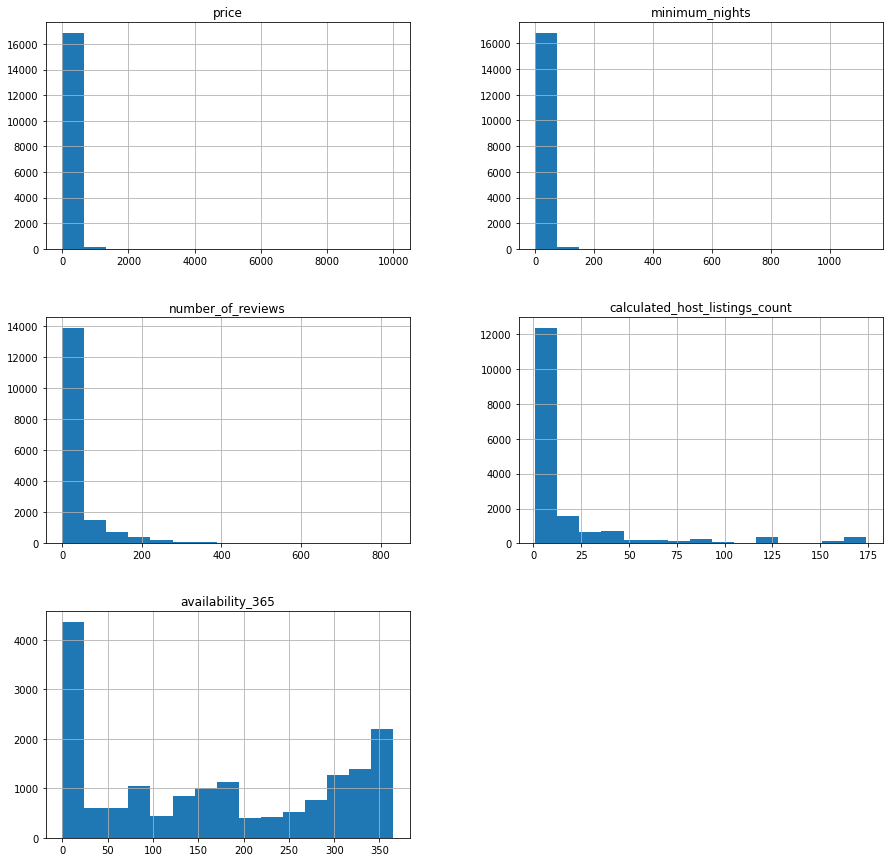

In [14]:
# plotar o histograma das variáveis de interesse
df.hist(['price', 'minimum_nights', 'number_of_reviews', 'calculated_host_listings_count', 'availability_365'], bins=15, figsize=(15,15))

### **Q4. Qual as estatísticas descritivas das variáveis numéricas de interesse?**
Como se pode perceber, com exceção do atributo 'availability_365', os demais apresentam elevada discrepância entre a mediana (percentil 50) e a média, o que sugere a existência de valores extremos causando distorção.

In [15]:
# ver a média da coluna `price``
df[['price', 'minimum_nights', 'number_of_reviews', 'calculated_host_listings_count', 'availability_365']].describe()

,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
count,17020.000000,17020.000000,17020.000000,17020.000000,17020.000000
mean,115.318214,12.250705,32.637955,17.957403,166.870153
std,313.154816,30.041188,65.286672,35.752686,133.523109
min,0.000000,1.000000,0.000000,1.000000,0.000000
25%,39.000000,1.000000,0.000000,1.000000,20.000000
50%,69.000000,3.000000,4.000000,3.000000,158.000000
75%,133.000000,30.000000,34.000000,15.000000,306.000000
max,9999.000000,1124.000000,831.000000,174.000000,365.000000


### **Q4. Há *outliers* presentes?**
Como visto no item anterior, há suspeita de existência de outliers. Isso pode ser confirmado a partir do boxplot dos atributos de interesse e, como esperado, apenas o atributo 'availability_365' não possui outliers nos 17.020 registros.

Diante de tal constatação, avalia-se a representatividade da quantidade de outliers superiores ao percentil 99 da distribuição de cada um dos atributos 'price', 'minimum_nights', 'number_of_reviews' e 'calculated_host_listings_count', para avaliar possível remoção de tais registros. Após tal cálculo, verifica-se que tais atributos correspondem a 1%, 0.55%, 0.99% e 0.00% das 17.020 linhas, o que nos indica que não há prejuízo ao *dataset* a remoção de tais valores extremos.

Após a remoção, chega-se a uma base modificada chamada 'df_clean' com 16.590 registros remanescentes, o que corresponde a uma eliminação de apenas 2,52% ou 430 entradas.




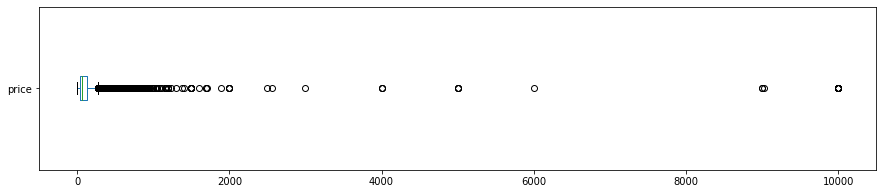

In [16]:
df.price.plot(kind="box", vert=False, figsize=(15, 3))

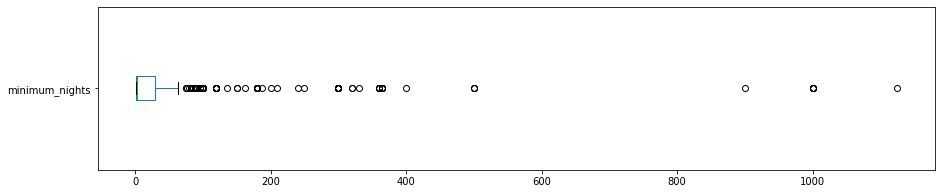

In [17]:
df.minimum_nights.plot(kind="box", vert=False, figsize=(15, 3))

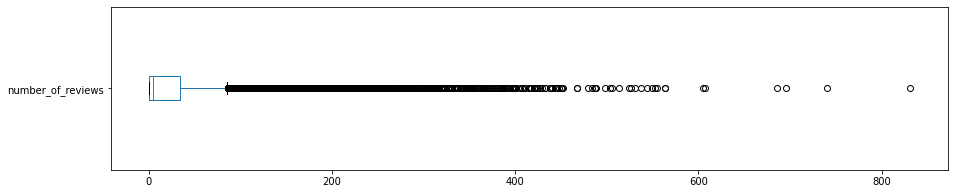

In [18]:
df.number_of_reviews.plot(kind="box", vert=False, figsize=(15, 3))

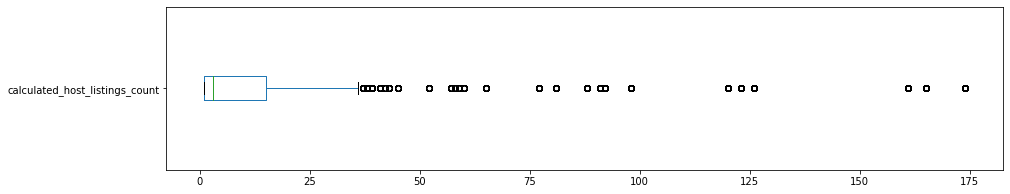

In [19]:
df.calculated_host_listings_count.plot(kind="box", vert=False, figsize=(15, 3))

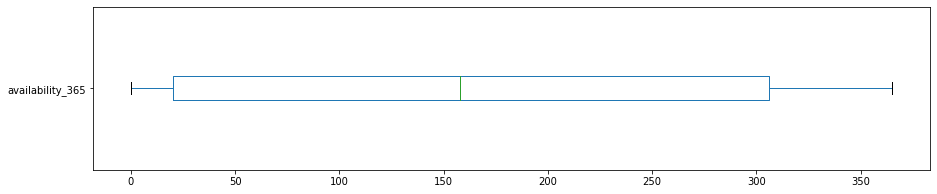

In [20]:
df.availability_365.plot(kind="box", vert=False, figsize=(15, 3))

In [21]:
rep_99 = [df.loc[df.price > np.percentile(a=df.price,q=99)].shape[0] * 100 /df.shape[0],
df.loc[df.minimum_nights > np.percentile(a=df.minimum_nights,q=99)].shape[0] * 100 /df.shape[0],
df.loc[df.number_of_reviews > np.percentile(a=df.number_of_reviews,q=99)].shape[0] * 100 /df.shape[0], 
df.loc[df.calculated_host_listings_count > np.percentile(a=df.calculated_host_listings_count,q=99)].shape[0] * 100 /df.shape[0]]
print(rep_99)

[1.0047003525264395, 0.5522914218566393, 0.9870740305522914, 0.0]


In [22]:
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > np.percentile(a=df.price,q=99)].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > np.percentile(a=df.minimum_nights,q=99)].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.number_of_reviews > np.percentile(a=df.number_of_reviews,q=99)].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.calculated_host_listings_count > np.percentile(a=df.calculated_host_listings_count,q=99)].index, axis=0, inplace=True)
df_clean.shape[0]

16590

In [23]:
(df_clean.shape[0]/df.shape[0] - 1)*100

-2.526439482961218

In [24]:
df_clean.shape[0]-df.shape[0]

-430

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe1324508d0>,
      dtype=object)

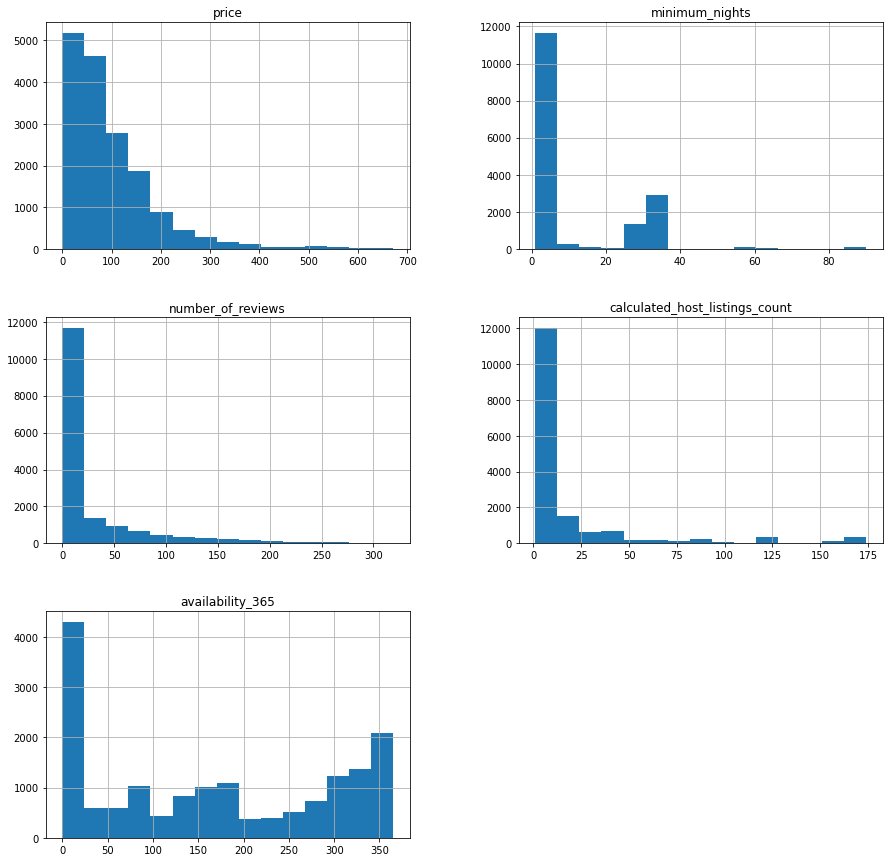

In [26]:
df_clean.hist(['price', 'minimum_nights', 'number_of_reviews', 'calculated_host_listings_count', 'availability_365'], bins=15, figsize=(15,15))

### **Q4. Qual a correlação existente entre as variáveis**

Após a remoção de *outliers*, passa-se a avaliar o grau de associação entre as variáveis de interesse, de maneira a possibilitar uma possível redução de dimensionalidade sem perda de informação importante.

Ao avaliar o mapa de calor gerado, percebe-se que há uma correlação importante de +0.72 entre os atributos 'reviews_per_month' e 'number_of_reviews'. Como 'reviews_per_month' possuía no *dataset* original em torno de 29% de seus valores ausentes e possui essa alta correlação com outra variável que não padece do mesmo problema, opta-se por eliminar este atributo.



In [27]:
# criar uma matriz de correlação
matriz_corr = df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']].corr()
# mostrar a matriz de correlação
display(matriz_corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,0.029133,0.004939,-0.003576,0.054829,0.059968
minimum_nights,0.029133,1.000000,-0.124960,-0.154201,0.057860,0.096621
number_of_reviews,0.004939,-0.124960,1.000000,0.724389,-0.121401,0.031078
reviews_per_month,-0.003576,-0.154201,0.724389,1.000000,-0.072584,0.061731
calculated_host_listings_count,0.054829,0.057860,-0.121401,-0.072584,1.000000,0.186906
availability_365,0.059968,0.096621,0.031078,0.061731,0.186906,1.000000


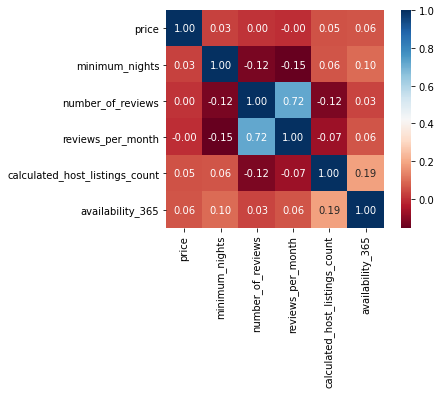

In [28]:
# plotar um heatmap a partir das correlações
sns.heatmap(matriz_corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True)

In [29]:
df_clean.drop(['reviews_per_month'], axis=1, inplace=True)

In [30]:
df_clean.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,calculated_host_listings_count,availability_365
0,18674,Huge flat for 8 people close to Sagrada Familia,71615,Mireia And Maria,Eixample,la Sagrada Família,41.40556,2.17262,Entire home/apt,169,1,21,2019-10-11,18,60
1,23197,Forum CCIB DeLuxe★Spacious &Elegant★Large Balcony,90417,Etain (Marnie),Sant Martí,el Besòs i el Maresme,41.41291,2.22063,Entire home/apt,240,3,52,2019-12-15,2,169
2,32711,Sagrada Familia area - Còrsega 1,135703,Nick,Gràcia,el Camp d'en Grassot i Gràcia Nova,41.40566,2.17015,Entire home/apt,144,2,63,2019-09-06,3,8
3,34241,Private Double room - Plaza Real,73163,Andres,Ciutat Vella,el Barri Gòtic,41.38062,2.17517,Private room,50,30,8,2012-12-30,2,35
4,34981,VIDRE HOME PLAZA REAL on LAS RAMBLAS,73163,Andres,Ciutat Vella,el Barri Gòtic,41.37978,2.17623,Entire home/apt,283,4,150,2020-03-11,2,148


### **Q5. Qual o tipo de imóvel mais alugado no Airbnb?**

A partir da avaliação do *dataset* remanescente, verifica-se que ~51.43% (8.533) das acomodações listadas se referem a um imóvel completo, enquanto ~45,81% (7.600) correspondem a um quarto privativo, compondo essas categorias substanciais ~97,24% dos registros.

Quanto aos quartos de hotel, verifica-se que correspondem a ~1,54% (256), enquanto os quartos compartilhados correspondem a ~1,21% (201).

In [31]:
# mostrar a quantidade de cada tipo de imóvel disponível
df_clean.room_type.value_counts()

Entire home/apt    8533
Private room       7600
Hotel room          256
Shared room         201
Name: room_type, dtype: int64

In [32]:
# mostrar a porcentagem de cada tipo de imóvel disponível
df_clean.room_type.value_counts() * 100 / df_clean.shape[0]

Entire home/apt    51.434599
Private room       45.810729
Hotel room          1.543098
Shared room         1.211573
Name: room_type, dtype: float64

### **Q6. Qual a localidade mais cara do dataset?**

É importante ressaltar que, devido à diferença na precificação entre os diversos tipos de acomodação, a média/mediana por bairro, sem levar em conta às características das acomodações listadas, pode ser enganosa, a depender da distribuição de cada tipo de acomodação no bairros. Por exemplo, imagine que um bairro muito valorizado apresente no *dataset* 90% de seus registros de aluguel de quartos privativos, os quais tendem a ser significativamente menos custosos que o aluguel do imóvel por completo. Poder-se-ia concluir que esse bairro não é tão caro, embora seja um dos mais valorizados.

Sabendo dessa característica, é recomendável que se faça a análise das médias/medianas por tipo de acomodação. Por medida de simplificação, serão feitas conclusões baseadas na categoria "Entire home/apt", a qual se refere ao aluguel de um imóvel completo.

A partir das listas de 10 maiores médias por bairro e da lista das 10 menores quantidade de registros, verifica-se:

i) o bairro 'la Marina del Prat Vermell', embora tenha a maior média de preços de imóveis completos para locação, possui apenas 3 acomodações listadas nesta categoria, o que limita as conclusões que podem ser obtidas através de tais dados;

ii) Realizando o cotejo entre as médias e quantidades, a partir do *dataset* em questão, chega-se aos 10 seguintes bairros que se destacam como mais custosos para o aluguel de imóveis inteiros:
* Vallvidrera, el Tibidabo i les Planes; 
* Diagonal Mar i el Front Marítim del Poblenou; 
* Pedralbes; 
* la Vila Olímpica del Poblenou; 
* la Dreta de l'Eixample; 
* el Poblenou; 
* Sant Gervasi - la Bonanova; 
* Vallcarca i els Penitents; 
* la Bordeta; 
* Sant Genís dels Agudells.

In [45]:
# ver preços por bairros, na média, para acomodações 'Entire home/apt' e 
list_entire_home_apt = [df_clean.loc[df_clean.room_type == 'Entire home/apt'].groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:15], df_clean.loc[df_clean.room_type == 'Entire home/apt'].groupby(['neighbourhood']).id.count().sort_values(ascending=True)[:15]]
print(list_entire_home_apt)

[neighbourhood
la Marina del Prat Vermell                      335.000000
Vallvidrera, el Tibidabo i les Planes           254.272727
Diagonal Mar i el Front Marítim del Poblenou    244.000000
Pedralbes                                       233.750000
la Vila Olímpica del Poblenou                   212.354167
la Dreta de l'Eixample                          183.222222
el Poblenou                                     163.012552
Sant Gervasi - la Bonanova                      152.678571
Vallcarca i els Penitents                       152.450000
la Bordeta                                      150.320000
Sant Genís dels Agudells                        150.000000
el Fort Pienc                                   147.730159
l'Antiga Esquerra de l'Eixample                 146.894928
la Sagrada Família                              145.911475
Sarrià                                          145.000000
Name: price, dtype: float64, neighbourhood
Ciutat Meridiana              1
Montbau                  

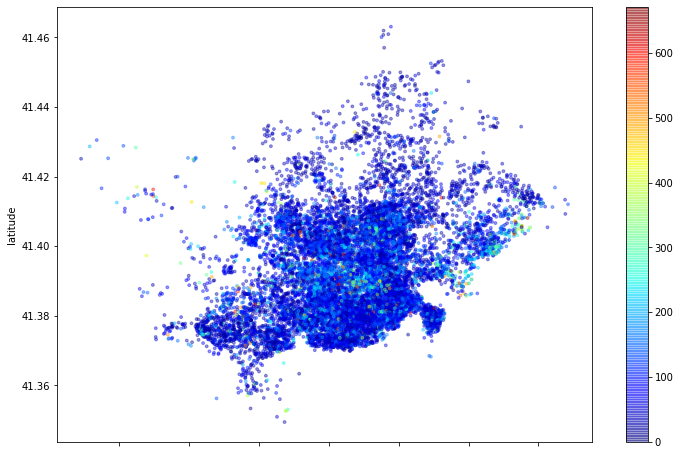

In [ ]:
# plotar os imóveis pela latitude-longitude
df_clean.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8, cmap=plt.get_cmap('jet'), figsize=(12,8))

### **Q7. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

In [42]:
# ver a média da coluna `minimum_nights``

df_clean.minimum_nights.mean()

10.900060277275466

## Conclusões


A análise aqui apresentada focou em dados resumidos de acomodações listadas no Airbnb, a qual nos fornece uma visão inicial das características de locações do site na cidade de Barcelona. 

Do *dataset* analisado, chegou-se às seguintes conclusões:
* Foram identificados dados ausentes em 4 atributos, sendo 2 de representatividade irrisória ('name'e 'host_name') - os quais foram removidas as linhas respectivas, e outros 2 com representatividade significativa ('last_review' e 'reviews_per_month') da ordem de 29% da base original - as quais são correlacionadas, razão pela qual se escolheu remover a última. A alta representatividade desses valores ausentes nesses atributos se justifica, uma vez que se referem a acomodações que nunca receberam qualquer avaliação no histórico do site;
* Houve identificação de outliers na calda direita da distribuição de 4 atributos numéricos, motivo pelo qual optou-se pela remoção dos dados discrepantes da distribuição de tais variáveis a partir da poda para valores maiores que o percentil 99 de suas distribuições;
* As variáveis numéricas do *dataset* apresentam baixo grau de correlação, com exceção dos atributos 'reviews_per_month' e 'last_review';
* Os tipos de acomodação listados são ~97% compostos por imóveis inteiros (51.4%) e quartos privativos (45.8%), possuindo participação pouco significativa os quartos de hotel e quartos compartilhados;
* Embora o bairro 'la Marina del Prat Vermell' figure com a maior média de preço de imóveis completos listados, não se pode concluir com alto percentual de probabilidade que este seja realmente o caso, ou até mesmo que seja um dos bairros mais custosos, uma vez que a amostra de imóveis completos listados no Airbnb para este bairro seja de apenas 3;
* Em média, os anfitriões responsáveis pelas acomodações listadas, independente do tipo, exigem uma estadia mínima de 10.9 noites como condição para locação.

Por fim, sugere-se, como continuação da investigação das locações em Barcelona, análise da base de dados completa, a qual possui 106 atributos disponíveis.